# Support Vector Machine

É um tipo de Aprendizado de Máquina Supervisionado. Pode ser usada para **classificação**, **regressão** (predição de um comportamento) e detecção de ***outliers***.


### Vantagens:


*   SVM's são muito bons para pequenos conjuntos de dados;
*   Ainda funcionam bem, mesmo quando o número de dimensões é maior que o número de amostras;
* Usa um subconjunto de pontos de treinamento na função de decisão (chamada de vetores de suporte, ***support vectors***), o que torna método eficiente em relação ao uso de memória;
* Versátil: a função de decisão pode ser usada com diferentes ***Kernels***;

### Desvantagens:

* Não é imune ao overfitting: a escolha das funções ***Kernel*** e do termo de ***regularização*** são cruciais;
* As SVMs não fornecem estimativas de probabilidade de forma simples.




## Formulação matemática

### O problema:
Consideremos o seguinte exemplo, onde temos duas ***classes*** de pontos e queremos determinar uma forma de separá-los.

![svm](pics/SVM/svm_byhand.png)

A escolha que podemos fazer é traçar **uma reta** para separar as duas classes.

Como determinar a melhor reta de separação? $\Rightarrow$ SVM: Determinando a **maior faixa de separação** entre os dois pontos mais próximos entre si das duas classes $\Rightarrow$ ***Widest Street Approach*** ==> **Maximização da Margem**

![svm](pics/SVM/svm_2.png)

Para construir o método de maximização da margem, vamos construir um vetor, **$\vec{w}$**, que seja ***perpendicular*** à reta mediana da margem (tracejada no desenho abaixo).

Em seguida, consideremos um vetor de uma classe desconhecida, $\vec{u}$. P

![svm](pics/SVM/svm_4.png)

Para saber se o vetor $\vec{u}$ pertence à amostra dos positivos '+' ou à amostra dos negativos '-', tomamos o produto escalar dos dois vetores e medimos se o resultado é maior que uma dada constante *C*:

$\vec{w}\cdot\vec{u} \ge C$

Sem perda de generalidade, podemos dizer que 

\begin{equation*}
\boxed{ \text{Se  } \vec{w}\cdot\vec{u} + b \ge 0 \; , \;\;\;\; \Rightarrow \;\;\;\; \textbf{amostra positiva '+'           (Decision Rule)}}
\end{equation*}


Essa é chamada a nossa **regra de decisão**, ou , do inglês ***decision rule***. Os vetores $\vec{w}$ são os **vetores de decisão** (decision vectors) é um dos pilares na definição do que é a **Support Vector Machine**.

Porém, ainda não temos vínculos o suficiente para restringir os valores de $\| \vec{w} \|$ e $b$. Então, para determinar esses valores, vamos impor vínculos ao nosso sistema. 

Se o vetor desconhecido $\vec{u}$ fizer parte da amostra '+', o denotamos como $\vec{x_{+}}$ e dizemos que sua projeção na direção normal à mediana tem que ser maior ou igual a 1. Se $\vec{u}$ fizer parte da amostra '-', o denotamos como $\vec{x_{-}}$ e sua projeção na direção normal à mediana tem que ser menor ou igual a -1. Ou seja,

\begin{equation*}
\vec{w}\cdot\vec{x_{+}} + b \ge +1 \; , \;\;\;\; \Rightarrow \;\;\;\; \textbf{amostra positiva '+'} \;\;\;\; \text{(1)}
\\
\vec{w}\cdot\vec{x_{-}} + b \le -1 \; , \;\;\;\; \Rightarrow \;\;\;\; \textbf{amostra negativa '-'} \;\;\;\; \text{(2)}
\end{equation*}

Introduzimos a variável $y_{i}$, tal que:

\begin{equation*}
y_{i} = +1, \;\;\;\; \text{para amostras '+'}
\\
y_{i} = -1, \;\;\;\; \text{para amostras '-'}
\end{equation*}

Podemos então multiplicar o lado esquerdo das equações (1) e (2) por $y_{i}$ e obtemos:

\begin{equation*}
y_{i}(\vec{x_{i}}\cdot\vec{w} + b) \ge +1 \; , \;\;\;\;  \;\;\;\; \textbf{para amostra positiva '+'} \;\;\;\; \text{(3)}
\\
y_{i}(\vec{x_{i}}\cdot\vec{w} + b) \ge +1 \; , \;\;\;\;  \;\;\;\; \textbf{para amostra negativa '-'} \;\;\;\; \text{(4)}              
\end{equation*}

E obtemos duas equações (3) e (4) idênticas. 

Podemos generalizá-la para:

\begin{equation*}
\boxed{y_{i}(\vec{x_{i}}\cdot\vec{w} + b) = 0} \;, \;\;\;\;  \;\;\;\; \textbf{para pontos $x_{i}$ da reta mediana} \;\;\;\; \text{(5)}             
\end{equation*}


Então, chegamos a uma equação para determinação de pontos na faixa de separação das amostras. 

Lembrando que queremos determinar **a maximização da faixa**. 

Podemos estimar a largura da faixa em termos dos vetores $x_{i}$ e do vetor normal unitário $\hat{w}$, tomando o **produto escalar** entre eles:

![svm](pics/SVM/svm_6.png)

\begin{equation*}
\large \textbf{largura} = (\vec{x_{+}} - \vec{x_{-}})\cdot\hat{w} = (\vec{x_{+}} - \vec{x_{-}})\cdot\frac{\vec{w}}{\|\vec{w}\|}
\end{equation*}


Da equação (5), podemos obter as expressões para os vetores $\vec{x_{+}}$ e $\vec{x_{-}}$.

Para $\vec{x_{i}}  = \vec{x_{+}}$, temos $y_{i} = +1 \Rightarrow \vec{x_{+}}\cdot \vec{w} + b - 1 = 0 \Rightarrow \vec{x_{+}}\cdot \vec{w} = 1 - b$   

Para $\vec{x_{i}}  = \vec{x_{-}}$, temos $y_{i} = -1 \Rightarrow (-1)(\vec{x_{-}}\cdot \vec{w} + b) - 1 = 0 \Rightarrow -\vec{x_{-}}\cdot \vec{w} -b - 1 = 0 \Rightarrow \vec{x_{-}}\cdot \vec{w} = -(1 + b)$ 


Logo,

\begin{eqnarray*}
\textbf{largura} = (\vec{x_{+}} - \vec{x_{-}})\cdot\hat{w} = (\vec{x_{+}} - \vec{x_{-}})\cdot\frac{\vec{w}}{\|\vec{w}\|}
\\
\large
 = \frac{((1 - b) + (1 + b))}{\|\vec{w}\|} = \frac{2}{\|\vec{w}\|}
\end{eqnarray*}


\\


Ou seja, para **maximizar a largura da faixa**, basta que maximizemos a expressão  $ \large \frac{2}{\|\vec{w}\|}$


Podemos rearrumar a expressão acima e dizer que:


\begin{equation*}
\large
\textbf{max}\Bigg(\frac{2}{\|\vec{w}\|}\Bigg) \rightarrow \textbf{min}\|\vec{w}\| \rightarrow \textbf{min}(\lambda \|\vec{w}\|^{2})
\end{equation*}


onde \lambda é uma constante.

Podemos então construir a seguinte função (com os vínculos que encontramos até agora), a qual precisaremos minimizar:

\begin{equation*}
\huge
L = \lambda \|\vec{w}\|^{2} - \sum_i \alpha_i \Bigg[y_{i}(\vec{w}\cdot{\vec{x_i}} + b) - 1 \Bigg]
\end{equation*}


onde $\alpha_i$ são constantes (multiplicadores de Lagrange).

Para encontrar os extremos de $L$, igualamos as derivadas a zero:

\begin{equation*}
\frac{\partial L}{\partial \vec{w}} = 2\lambda\vec{w} - \sum_i \alpha_i y_{i}\vec{x_{i}} = 0 \Rightarrow \boxed{ \vec{w} = \frac{1}{2\lambda} \sum_i \alpha_i y_{i}\vec{x_{i}}} \;\;\;\; (6)
\\
\frac{\partial L}{\partial b} = -\sum_i \alpha_i y_{i} = \Rightarrow \boxed{\sum_i \alpha_i y_{i} = 0} \;\;\;\; (7)
\end{equation*}


A equação (6) nos diz que o vetor $\vec{w}$ é uma soma linear de alguns vetores de amostra (pois $\alpha_i$ pode ser zero para alguns vetores).

Agora que obtivemos uma expressão para $\vec{w}$, podemos aplicá-la à função $L$ que queremos minizar. Temos então:

\begin{gather*}
L = \frac{\lambda}{4\lambda^{2}}\Bigg(\sum_i \alpha_i y_i \vec{x_i} \Bigg) \cdot \Bigg( \sum_j\alpha_j y_j \vec{x_j} \Bigg) - \frac{1}{2\lambda}\Bigg( \sum_i \alpha_i y_i \vec{x_i} \Bigg) \cdot \Bigg( \sum_j\alpha_j y_j \vec{x_j} \Bigg) - b\sum_i\alpha_i y_i + \sum_i \alpha_i
\\
\large
\boxed{L = \sum_i \alpha_i - \frac{1}{4\lambda}\sum_i \sum_j \alpha_i \alpha_j y_i  y_j  \vec{x_i} \cdot \vec{x_j}} \;\;\;\; (8)
\end{gather*}

Com expressão em (8), nós descobrimos que a expressão a ser minimizada, ou seja, a **otimização**, depende somente do $\color{red} {\textbf{produto escalar de pares de vetor das amostras}}$.


A função $L$ também é chamada e "**Loss Function**". A constante $\lambda$ também é chamada de **termo de regularização**.

Se voltarmos agora à **regra de decisão** e subsituirmos o vetor de decisão \vec{w} pela expressão (6), temos:

\begin{equation*}
\text{Se  } \vec{w}\cdot\vec{u} + b \ge 0 \; , \;\;\;\; \Rightarrow \;\;\;\; \textbf{amostra positiva '+'}
\\
\large
\boxed{\frac{1}{2\lambda}\sum_i\alpha_i y_i \boxed{\vec{x_i} \cdot \vec{u}} + b \ge 0} \Rightarrow +
\end{equation*}

Ou seja, a regra de decisão depende do **produto escalar entre o vetor de amostra e o vetor desconhecido**.

E é possível resolver numericamente a equação (8) para encontrar os valores otimizados de $\alpha$ que maximizam a separação entre os dois pontos mais próximos das diferentes amostras. E o algoritmo, na verdade usa somente os vetores que definem a faixa de maximização. Para todos os outros, $\alpha$ é zero. Ou seja, a SVM usa somente uma **sub-amostra das asmostras de treinamento**. Por isso, sua eficiência computacional.

### O método de SVM como vimos até agora só funciona para amostras linearmente separáveis

Para amostras que não são linearmente separáveis, podemos aplicar uma transformação, $\phi(\vec{x})$, nos vetores de amostra, adicionando uma dimensão ao problema e tornando a separação novamente possível.

![svm_higherdim](pics/SVM/svm_stackoverflow.png)


Como:
1. a maximização da faixa depende somente do produto escalar entre dois vetores de amostra (***support vectors***);
1. a regra de decisão (para a predição do método sobre um vetor desconhecido) depende do produto escalar de um vetor de amostra com o vetor desconhecido;


$\Rightarrow$ para encontrar um espaço onde as duas amostras sejam separáveis (função otimizável) e seja possível fazer predições de uma amostra desconhecida, devemos:

1. aplicar a transformação $\phi$ no prodtue escalar dos vetores de amostras: $\phi(x_i) \cdot \phi(x_j)$
1. aplicar a transformação no produto escalar de um vetor de amostra com um desconhecido (regra de decisão): $\phi(x_i) \cdot \phi(\vec{u})$

Podemos então construir uma função K, que chamamos de função **Kernel**, que tenha a forma:

\begin{equation*}
\large
K = \phi(\vec{x_i}) \cdot \phi(\vec{x_j})
\end{equation*}

Ou seja, não precisamos saber a função de transformação, mas o produto escalar das trnasformações. Assim, podemos separar amostras que não são linearmente separáveis.

Algumas funções Kernel comumente usadas são:

* Linear: $\large {\vec{x_i} \cdot \vec{x_j}}$
* Polinomial: $\large {(\vec{x_i} \cdot \vec{x_j} + r)^d }$
* RBF (Radial Basis Function): $ \large {e^{-\gamma \|x_i - x_j \|^{2}} }$
* Sigmoid: $\large { tanh(\gamma(\vec{x_i} \cdot \vec{x_j}) + r) }$

### Vantagens:


*   SVM's são muito bons para pequenos conjuntos de dados;
*   Ainda funcionam bem, mesmo quando o número de dimensões é maior que o número de amostras;
* Usa um subconjunto de pontos de treinamento na função de decisão (chamada de vetores de suporte, ***support vectors***), o que torna método eficiente em relação ao uso de memória;
* Versátil: a função de decisão pode ser usada com diferentes ***Kernels***;

### Desvantagens:

* Não é imune ao overfitting: a escolha das funções ***Kernel*** e do termo de ***regularização*** são cruciais;
* As SVMs não fornecem estimativas de probabilidade de forma simples.


## Exemplo de SVM
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

Vamos desenvolver a intuição por trás das SVMs e usá-las como uma forma de classificar amostras.

Começamos com os imports:

In [121]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Em SVM, classificamos as amostras de acordo com um simples separação entre as classes. Essa separação pode ser uma linha (em 1D), uma curva (em 2D) ou uma variedade (em múltiplas dimensões).

Vamos considerar um caso simples de classificação em que as duas classes de pontos são claramente separáveis:

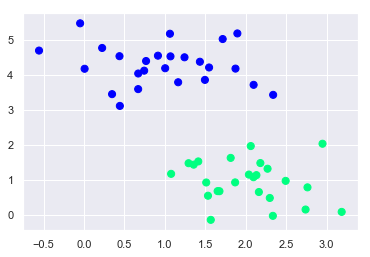

In [122]:
from sklearn.datasets.samples_generator import make_blobs
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X, y = make_blobs(n_samples=50, n_features=2, centers=2,
                  random_state=0, cluster_std=0.60)
#print(X, X[:,0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

Com um classificador linear, devemos escolher a melhor reta para separar as duas classes da figura acima. Porém, temos várias possibilidades!

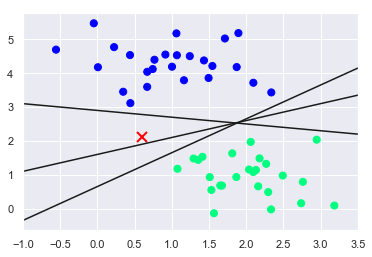

In [123]:
xfit = np.linspace(-1, 3.5)                         
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
# colocar um marcador no plot:
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

# Escolhemos 3 possíveis valores de coef angular e linear para as retas classificadoras que queremos traçar:
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

As três retas acima são todas boas **separadoras**, porém, dependendo da escolha do separador, um novo ponto 'X' terá atribuído ***labels*** diferentes.

### Support Vector Machine

A ideia da SVM é que ao invés de escolhermos uma simples reta, podemos escolher uma ***margem*** em volta da reta, que determina uma faixa entre os pontos mais próximos. 

Vamos ver nossas possíveis escolhas:

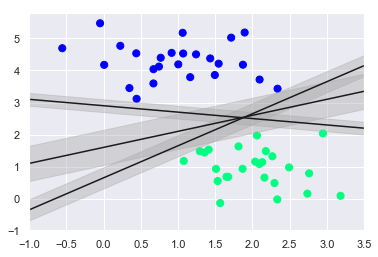

In [81]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

**SVM**: determina a linha que **maximiza a margem**.

## Ajustando uma Support Vector Machine
Usaremos uma implementação de SVM do [***scikit-learn***](https://scikit-learn.org/stable/modules/svm.html#)

Vamos treinar o classificar SVM nos dados que geramos aqui. Por enquanto, usaremos um **Kernel linear** e faremos ***C*** como sendo um número muito grande.  

In [82]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Vamos criar uma função para visualizar os **vetores e limites de decisão** da SVM:

In [89]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

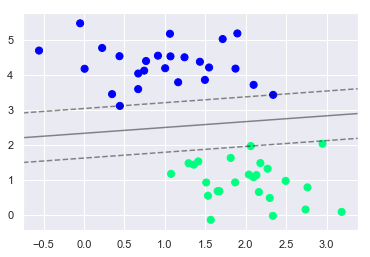

In [90]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model, plot_support=True)

Os pontos que tocam as linhas da margem definem os **support vectors**

In [71]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

O sucesso da SVM está baseado no fato de que somente os support vectors contam para o ajuste. Todos os outros pontos de amotras têm os coeficientes $\alpha = 0$.

Podemos ver abaixo um exemplo disso, ao treinar a SVM com as primeiras 60 amostras geradas e com as primeiras 120 amostras geradas.

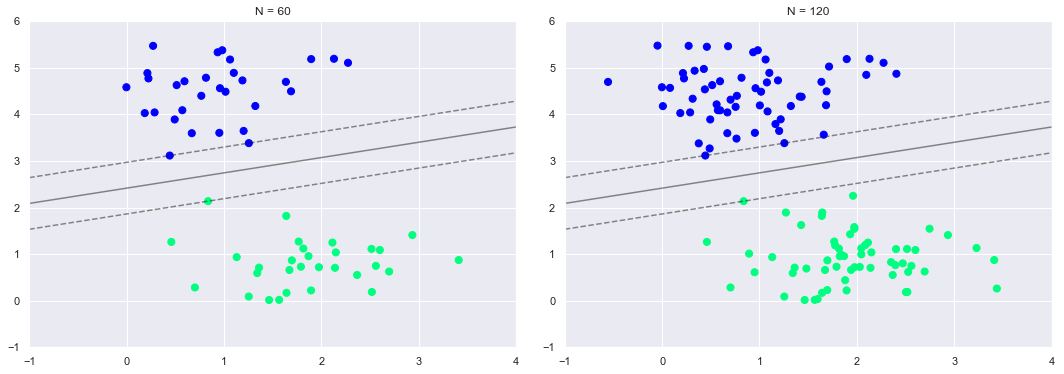

In [77]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Além dos separadores lineares: A função Kernel da SVM

Quando não há uma separação linear possível, podemos aplicar uma função de transformação para um outro espaço de dimensão maior e conseguir então separar as amostras nesse outro espaço.

Vejamos um exemplo onde os dados não são linearmente separáveis:

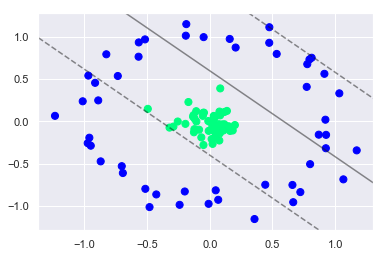

In [113]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=False);

Vamos escolher a seguinte função:

In [114]:
r = np.exp(-(X ** 2).sum(1))

Vamos visualizar os dados com a dimensão adicional introduzida por $r$:

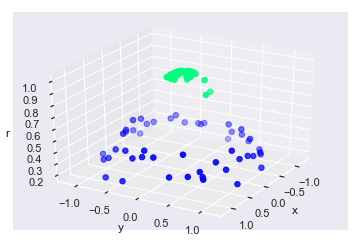

In [115]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=30, cmap='winter')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D();

Através da função de Kernel, não precisamos saber a transformção explicitamente, mas somente o produto escalar da transformação nos vetores de suporte.

Esse ***truque de Kernel*** está implementado na SVM do ***scikit-learn***:

In [119]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

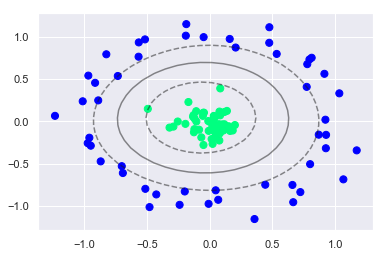

In [117]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## Ajustando a SVM: suavizando as margens

Os exemplos que vimos até aqui foram de dados muito bem separados. Porém, podemos ter casos em que isso não acontede:

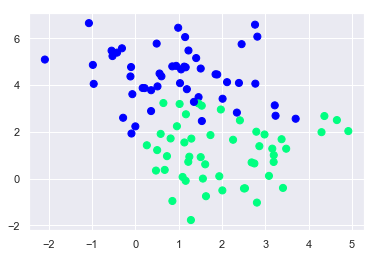

In [120]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

A suavização da margem é feita ajustando o parâmetro $C$.

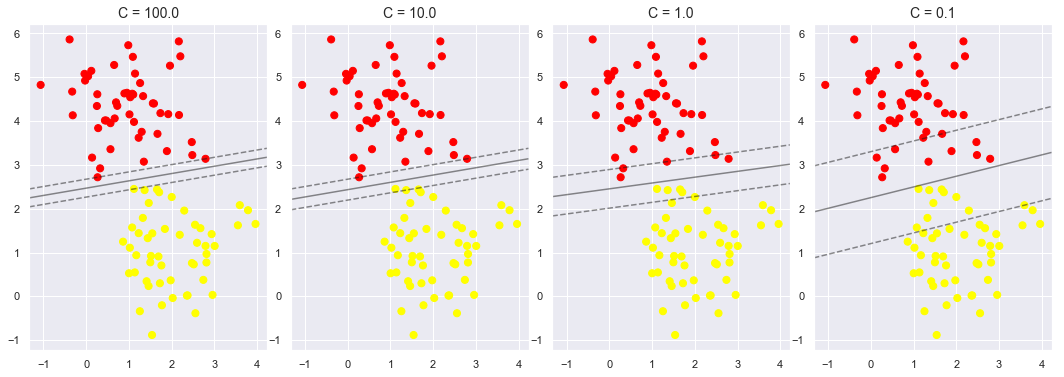

In [126]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 4, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 10.0, 1.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

O melhor valor do parâmetro $C$ vai depender do conjunto de dados.

### Exercícios:

1.   Construa um algoritmo de SVM linear "à mão";
2. Aplique o classificador de SVM para fazer reconhecimento facial.


### Referências:



1. Exemplos:
* https://scikit-learn.org/stable/modules/svm.html

2. Classificação de números:
> https://github.com/ksopyla/svm_mnist_digit_classification

3. Vídeos:
   * MIT Public Lecture: https://www.youtube.com/watch?v=_PwhiWxHK8o
   * https://www.youtube.com/watch?v=g8D5YL6cOSE



